1. Прочитайте CSV файл.


In [1]:
import pandas as pd

Завантажте датасет Global YouTube Statistics 2023 з Kaggle
https://www.kaggle.com/datasets/datasnaek/global-youtube-statistics-2023
Збережіть його у файлі global_youtube_statistics_2023.csv

In [3]:
df = pd.read_csv('global_youtube_statistics_2023.csv', encoding='unicode_escape')

2. Виведіть перші п'ять рядків

In [4]:
print(df.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

3. Виведіть розміри датасету, перевірте наявність пропусків, дублікатів.

In [6]:
print(df.shape)

(995, 28)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [9]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [10]:
df.duplicated().sum()

0

4. Якщо є пропуски, замінить тип даних на float і середнє значення за
стовпцем.

In [12]:
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].str.isnumeric().any():
            df[col] = df[col].astype('float')
            df[col].fillna(df[col].mean(), inplace=True)

5. Ще раз перевірте кількість пропусків.

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

6. Перевірте, скільки унікальних країн представлено у колонці "Country"

In [15]:
print(df['Country'].unique())

['India' 'United States' nan 'Japan' 'Russia' 'South Korea'
 'United Kingdom' 'Canada' 'Brazil' 'Argentina' 'Chile' 'Cuba'
 'El Salvador' 'Pakistan' 'Philippines' 'Thailand' 'Colombia' 'Barbados'
 'Mexico' 'United Arab Emirates' 'Spain' 'Saudi Arabia' 'Indonesia'
 'Turkey' 'Venezuela' 'Kuwait' 'Jordan' 'Netherlands' 'Singapore'
 'Australia' 'Italy' 'Germany' 'France' 'Sweden' 'Afghanistan' 'Ukraine'
 'Latvia' 'Switzerland' 'Vietnam' 'Malaysia' 'China' 'Iraq' 'Egypt'
 'Andorra' 'Ecuador' 'Morocco' 'Peru' 'Bangladesh' 'Finland' 'Samoa']


7. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):

<Axes: >

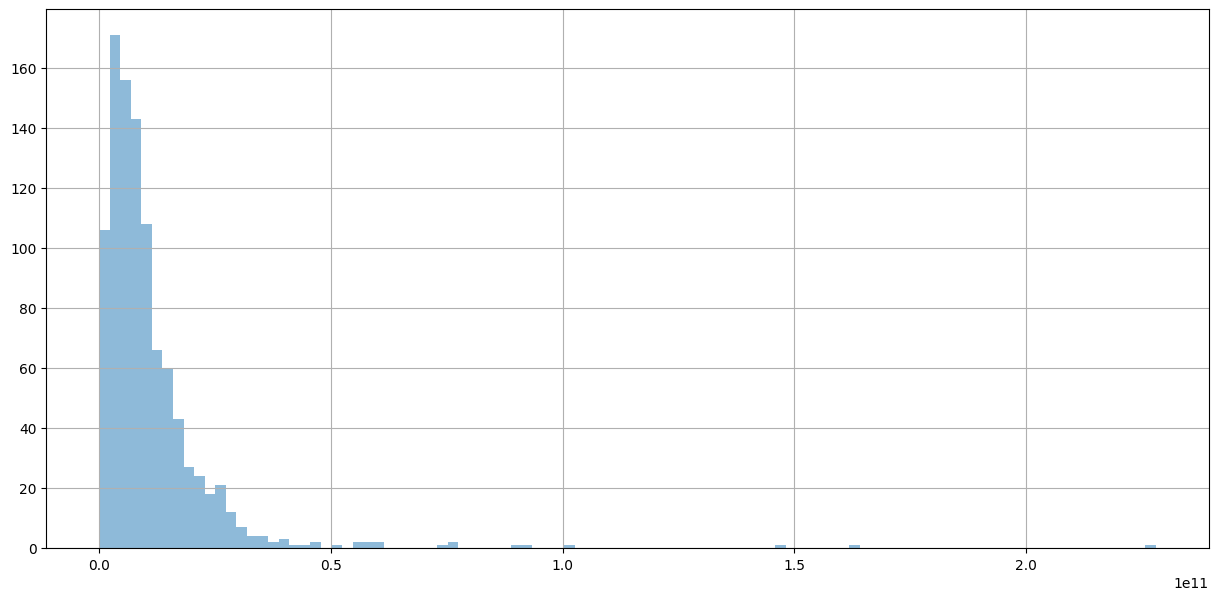

In [17]:
df['video views'].hist(bins=100, figsize=(15, 7), alpha=0.5)

8. Визначте максимальну, мінімальну, середню кількість переглядів
(використовуйте методи max, min, mean)

In [18]:
print(df['video views'].max())
print(df['video views'].min())
print(df['video views'].mean())

228000000000.0
0.0
11039537052.03819


9. Знайдіть країну, де найбільше відео було завантажено на YouTube

In [19]:
print(df['Country'].value_counts().sort_values(ascending=False).head(1))

United States    313
Name: Country, dtype: int64


10. Знайдіть відео (виведіть його назву) з найбільшою та найменшою
кількістю завантажень uploads.

In [21]:
print(df[df['uploads'] == df['uploads'].max()]['Title'])
print(df[df['uploads'] == df['uploads'].min()]['Title'])

95    ABP NEWS
Name: Title, dtype: object
5                         Music
12                       Gaming
57                   brightside
73     Luis Arturo Villar Sudek
102                        News
113       T- Series Apna Punjab
149                   luisfonsi
166                frostdiamond
180                Aditya Music
190           Sandeepmaheshwari
217       1MILLION Dance Studio
226               Fede Vigevani
236                  ChrisBrown
273                     FaZeRug
299                 Alan Becker
340                        YOLO
360           Minecraft - Topic
377                  linkinpark
386               FamilyGamesTV
394         Homem Aranha player
440              Masha e o Urso
463            Alejandro Basalo
468         Goodmythicalmorning
476                 Ajay Sharma
508            TheGameTheorists
544        Doggy Doggy Cartoons
554               werever2morro
592                        Live
600           larosadeguadalupe
604                   enesbatu